<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 68kB/s 
     |████████████████████████████████| 3.1MB 38.7MB/s 
     |████████████████████████████████| 501kB 38.5MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
tf.__version__

'2.0.0-beta1'

# Classifier Neural Network

In [0]:
data = load_breast_cancer ()

In [6]:
type (data)
dir (data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [0]:
X = data.data

In [0]:
y = data.target

In [0]:
scaler = StandardScaler ()
X_scale = scaler.fit_transform (X)
X_train, X_test, y_train, y_test = train_test_split (X_scale, y, test_size=0.20, random_state=23)

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
N, D = X_train.shape
layers_c =  [tf.keras.layers.Input(shape=(D,)), 
           tf.keras.layers.Dense(D/3, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')]
classifier = tf.keras.models.Sequential (layers_c)

In [0]:
classifier.compile (optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


In [14]:
len (X_train)

455

In [0]:
%%capture
c = classifier.fit (X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [16]:
print ('Training Set Evaluation : ' + str(classifier.evaluate (X_train, y_train)))
print ('Test Set Evaluation : ' + str(classifier.evaluate (X_test, y_test)))

455/455 [==============================] - 0s 110us/sample - loss: 0.0401 - accuracy: 0.9934
Training Set Evaluation : [0.04007744612274589, 0.9934066]
114/114 [==============================] - 0s 69us/sample - loss: 0.0573 - accuracy: 0.9825
Test Set Evaluation : [0.05726310272554034, 0.98245615]


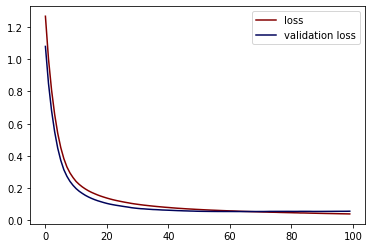

In [17]:
plt.plot (c.history['loss'], label='loss', color='#840000')
plt.plot (c.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

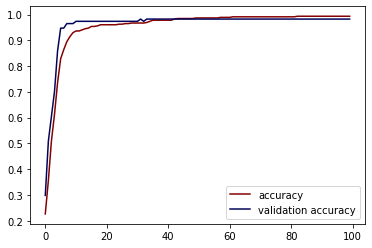

In [18]:
plt.plot (c.history['accuracy'], label='accuracy', color='#840000')
plt.plot (c.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()

### Observations

1.   [First Run] Odd accuracy and loss graphing, however compared to usual Neural Networks (comparing using accuracy) classifier model nearly got 99% representation given the data. It didn't actually nead multiple epochs - this was overkill.
2.   [Second run] After running some tweaks in the code, and running a clean kernel - now have typical validation and accuracy graphs with a 98% score.


# Regression Neural Network

In [0]:
layers_r =  [tf.keras.layers.Input(shape=(D,)), 
           tf.keras.layers.Dense(D/3, activation='relu'),
           tf.keras.layers.Dense(1, activation=None)]

In [0]:
sgd = tf.keras.optimizers.SGD (learning_rate=0.01, decay=1e-6, nesterov=False)

*Note : This was added in order to create a learning rate decay. Given the observed standard optimizer's loss was not minimizing after a few epochs.*

In [24]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-01-08 18:24:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-01-08 18:24:50 (50.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [52]:
data = pd.read_csv('moore.csv', header=None)
data.head(3)

,0,1
0,1971,2300
1,1972,3500
2,1973,2500


In [0]:
X = data.iloc[:,0].to_numpy().reshape(-1,1)
y = data.iloc[:,1].to_numpy().reshape(-1,1)

In [0]:
y = np.log (y)

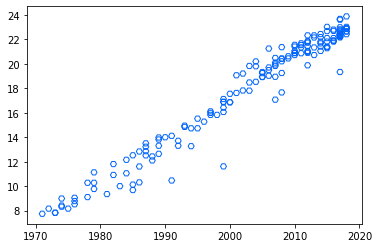

In [79]:
plt.scatter (X, y, edgecolors='#0165fc', marker='H', facecolors='none')